In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tqdm import tqdm as tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
np.random.seed(1)
n_points = 500
y = np.concatenate((np.zeros(n_points),np.ones(n_points),np.ones(n_points)*2,np.ones(n_points)*3,np.ones(n_points)*4,
                    np.ones(n_points)*5,np.ones(n_points)*6,np.ones(n_points)*7,np.ones(n_points)*8,np.ones(n_points)*9))
#y = np.random.randint(0,3,6000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500


In [3]:
x = np.zeros((n_points*10,5))

In [4]:
np.random.seed(1)
cov_mat = [[0.002,0,0,0,0],[0,0.002,0,0,0],[0,0,0.002,0,0],
                                                 [0,0,0,0.002,0],[0,0,0,0,0.002]]

x[idx[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [0,0,0,-0.75,0.5],
                                            cov=cov_mat,size=sum(idx[3]))



x[idx[4],:] = np.random.multivariate_normal(mean = [0,0,0,0.65,-0.65],
                                            cov=cov_mat,size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [0,0,0,-0.9,-0.75],
                                            cov=cov_mat,size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [0,0,0,0.8,-0.8],
                                            cov=cov_mat,size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [0,0,0,-0.5,0.8],
                                            cov=cov_mat,size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [0,0,0,0.9,0.75],
                                            cov=cov_mat,size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [0,0,0,-1,0.65],
                                            cov=cov_mat,size=sum(idx[9]))




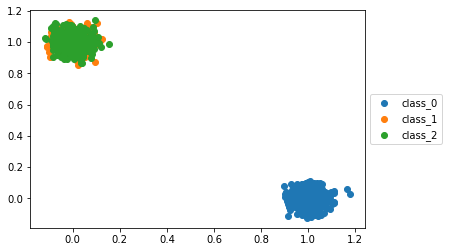

In [5]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))



plt.scatter(x[idx[2],1],x[idx[2],2],label="class_"+str(2))

# plt.scatter(x[idx[3],0],x[idx[3],1],label="class_"+str(3))



# plt.scatter(x[idx[4],0],x[idx[4],1],label="class_"+str(4))


# plt.scatter(x[idx[5],0],x[idx[5],1],label="class_"+str(5))


# plt.scatter(x[idx[6],0],x[idx[6],1],label="class_"+str(6))


# plt.scatter(x[idx[7],0],x[idx[7],1],label="class_"+str(7))


# plt.scatter(x[idx[8],0],x[idx[8],1],label="class_"+str(8))


# plt.scatter(x[idx[9],0],x[idx[9],1],label="class_"+str(9))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
mean_x = np.mean(x,axis=0,keepdims=True)
std_x = np.std(x,axis=0,keepdims=True)
x = ( x -  mean_x ) / std_x

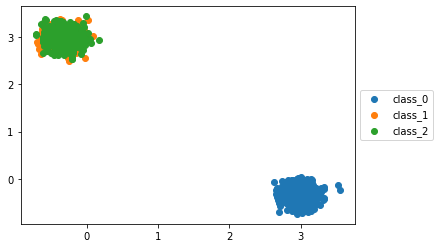

In [7]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))



plt.scatter(x[idx[2],1],x[idx[2],2],label="class_"+str(2))


# plt.scatter(x[idx[3],0],x[idx[3],1],label="class_"+str(3))



# plt.scatter(x[idx[4],0],x[idx[4],1],label="class_"+str(4))


# plt.scatter(x[idx[5],0],x[idx[5],1],label="class_"+str(5))


# plt.scatter(x[idx[6],0],x[idx[6],1],label="class_"+str(6))


# plt.scatter(x[idx[7],0],x[idx[7],1],label="class_"+str(7))


# plt.scatter(x[idx[8],0],x[idx[8],1],label="class_"+str(8))


# plt.scatter(x[idx[9],0],x[idx[9],1],label="class_"+str(9))


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
print(np.mean(x)),print(np.std(x))

6.423306331271305e-17
1.0000000000000004


(None, None)

In [9]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(5,1, bias=False)
        torch.nn.init.xavier_normal_(self.fc1.weight)

    def forward(self,z):
        out = self.helper(z)
        return out[:,0]
  
    
    def helper(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        return x

In [10]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(5,3, bias=True)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        torch.nn.init.zeros_(self.fc1.bias)

    def forward(self,z):
        out = self.helper(z)
        return out
    def helper(self, x):
        x = self.fc1(x)
        return x

# fg vs bg

In [11]:
y_labels = np.zeros(y.shape)
y_labels[idx[0]] = 1
y_labels[idx[1]] = 1
y_labels[idx[2]] = 1

In [12]:
class SyntheticDataset(Dataset):
  """SyntheticDataset dataset."""

  def __init__(self, data,labels):
    self.data = data
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.data[idx] , self.labels[idx]

In [13]:
batch  = 250
ds = SyntheticDataset(x,y_labels)
train_loader =  DataLoader( ds,batch_size= batch ,shuffle=True)

In [14]:
torch.manual_seed(12)
net1 = Net1().double()

In [15]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net1.parameters(), lr=0.001,weight_decay=1e-5 ) #, momentum=0.9)

In [16]:
nos_epochs = 200
epoch_loss = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    cnt = 0 
    running_loss = 0.0

    correct = 0
    total = 0 
    #training data set
    for i, data in  enumerate(train_loader):
        inputs , labels = data
        batch = inputs.size(0)
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        inputs = inputs.double()
        # zero the parameter gradients
    
        optimizer.zero_grad()
        outputs = net1(inputs)
        
        
        prediction = outputs>0.5
        
        
        correct += torch.sum(prediction == labels)
        total += len(labels)
        
        
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        mini = 20
        if cnt % mini == mini-1:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
            epoch_loss.append(running_loss/mini)
            running_loss = 0.0
        cnt=cnt+1
        
    print("Accuracy: ",correct.item(),total,correct.item()/total)
    if(np.mean(epoch_loss) <= 0.001):
        break;
    
print('Finished Training')

[1,    20] loss: 0.550
Accuracy:  2606 5000 0.5212
[2,    20] loss: 0.535
Accuracy:  2810 5000 0.562
[3,    20] loss: 0.520
Accuracy:  3000 5000 0.6
[4,    20] loss: 0.506
Accuracy:  3203 5000 0.6406
[5,    20] loss: 0.493
Accuracy:  3430 5000 0.686
[6,    20] loss: 0.480
Accuracy:  3637 5000 0.7274
[7,    20] loss: 0.468
Accuracy:  3810 5000 0.762
[8,    20] loss: 0.456
Accuracy:  3993 5000 0.7986
[9,    20] loss: 0.445
Accuracy:  4130 5000 0.826
[10,    20] loss: 0.434
Accuracy:  4268 5000 0.8536
[11,    20] loss: 0.424
Accuracy:  4380 5000 0.876
[12,    20] loss: 0.414
Accuracy:  4478 5000 0.8956
[13,    20] loss: 0.404
Accuracy:  4562 5000 0.9124
[14,    20] loss: 0.395
Accuracy:  4632 5000 0.9264
[15,    20] loss: 0.386
Accuracy:  4674 5000 0.9348
[16,    20] loss: 0.378
Accuracy:  4720 5000 0.944
[17,    20] loss: 0.369
Accuracy:  4760 5000 0.952
[18,    20] loss: 0.362
Accuracy:  4807 5000 0.9614
[19,    20] loss: 0.354
Accuracy:  4843 5000 0.9686
[20,    20] loss: 0.347
Accurac

[172,    20] loss: 0.062
Accuracy:  5000 5000 1.0
[173,    20] loss: 0.061
Accuracy:  5000 5000 1.0
[174,    20] loss: 0.061
Accuracy:  5000 5000 1.0
[175,    20] loss: 0.060
Accuracy:  5000 5000 1.0
[176,    20] loss: 0.060
Accuracy:  5000 5000 1.0
[177,    20] loss: 0.059
Accuracy:  5000 5000 1.0
[178,    20] loss: 0.059
Accuracy:  5000 5000 1.0
[179,    20] loss: 0.058
Accuracy:  5000 5000 1.0
[180,    20] loss: 0.058
Accuracy:  5000 5000 1.0
[181,    20] loss: 0.057
Accuracy:  5000 5000 1.0
[182,    20] loss: 0.057
Accuracy:  5000 5000 1.0
[183,    20] loss: 0.057
Accuracy:  5000 5000 1.0
[184,    20] loss: 0.056
Accuracy:  5000 5000 1.0
[185,    20] loss: 0.056
Accuracy:  5000 5000 1.0
[186,    20] loss: 0.055
Accuracy:  5000 5000 1.0
[187,    20] loss: 0.055
Accuracy:  5000 5000 1.0
[188,    20] loss: 0.054
Accuracy:  5000 5000 1.0
[189,    20] loss: 0.054
Accuracy:  5000 5000 1.0
[190,    20] loss: 0.054
Accuracy:  5000 5000 1.0
[191,    20] loss: 0.053
Accuracy:  5000 5000 1.0


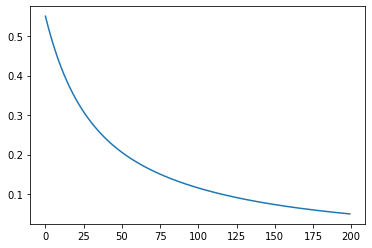

In [17]:
plt.plot(epoch_loss)

# fg1 vs fg2 vs fg3

In [18]:
x_data = x[:1500]
y_data = y[:1500]

In [19]:
batch  = 250
ds1 = SyntheticDataset(x_data,y_data)
train_loader1 =  DataLoader( ds1,batch_size= batch ,shuffle=True)

In [20]:
torch.manual_seed(12)
net2 = Net2().double()

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.007,weight_decay=1e-5 ) #, momentum=0.9)

In [22]:
nos_epochs = 200
epoch_loss = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    cnt = 0 
    running_loss = 0.0

    correct = 0
    total = 0 
    #training data set
    for i, data in  enumerate(train_loader1):
        inputs , labels = data
        batch = inputs.size(0)
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        inputs = inputs.double()
        labels = labels.long()
        # zero the parameter gradients
    
        optimizer.zero_grad()
        outputs = net2(inputs)
        
        
        #prediction = outputs>0.5
        _, prediction = torch.max(outputs.data, 1)
        
        
        correct += torch.sum(prediction == labels)
        total += len(labels)
        
        
        
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        mini = 6
        if cnt % mini == mini-1:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
            epoch_loss.append(running_loss/mini)
            running_loss = 0.0
        cnt=cnt+1
        
    print("Accuracy: ",correct.item(),total,correct.item()/total)
    if(np.mean(epoch_loss) <= 0.001):
        break;
    
print('Finished Training')

[1,     6] loss: 3.027
Accuracy:  187 1500 0.12466666666666666
[2,     6] loss: 2.785
Accuracy:  462 1500 0.308
[3,     6] loss: 2.554
Accuracy:  500 1500 0.3333333333333333
[4,     6] loss: 2.334
Accuracy:  500 1500 0.3333333333333333
[5,     6] loss: 2.125
Accuracy:  500 1500 0.3333333333333333
[6,     6] loss: 1.923
Accuracy:  500 1500 0.3333333333333333
[7,     6] loss: 1.732
Accuracy:  500 1500 0.3333333333333333
[8,     6] loss: 1.550
Accuracy:  500 1500 0.3333333333333333
[9,     6] loss: 1.377
Accuracy:  500 1500 0.3333333333333333
[10,     6] loss: 1.217
Accuracy:  500 1500 0.3333333333333333
[11,     6] loss: 1.066
Accuracy:  500 1500 0.3333333333333333
[12,     6] loss: 0.932
Accuracy:  500 1500 0.3333333333333333
[13,     6] loss: 0.810
Accuracy:  500 1500 0.3333333333333333
[14,     6] loss: 0.704
Accuracy:  534 1500 0.356
[15,     6] loss: 0.609
Accuracy:  882 1500 0.588
[16,     6] loss: 0.531
Accuracy:  1379 1500 0.9193333333333333
[17,     6] loss: 0.463
Accuracy:  149

[166,     6] loss: 0.007
Accuracy:  1500 1500 1.0
[167,     6] loss: 0.007
Accuracy:  1500 1500 1.0
[168,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[169,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[170,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[171,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[172,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[173,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[174,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[175,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[176,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[177,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[178,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[179,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[180,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[181,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[182,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[183,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[184,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[185,     6] loss: 0.005
Accuracy:  1500 1500 1.0


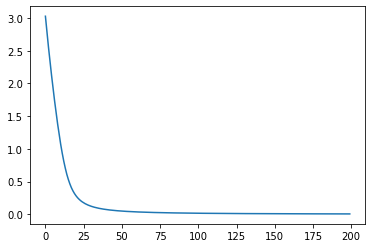

In [23]:
plt.plot(epoch_loss)

# hard attention mosaic data training

In [24]:
foreground_classes = {'class_0','class_1' }

background_classes = {'bg_classes',}

In [25]:
desired_num = 1100  # 100 + 1000


m = 100



mosaic_list_of_images =[]
mosaic_label = []
fore_idx=[]
for j in tqdm(range(desired_num)):
    np.random.seed(j)
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,m)
    a = []
    for i in range(m):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_of_images.append(np.reshape(a,(m,5)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

100%|██████████████████████████████████████| 1100/1100 [00:02<00:00, 389.23it/s]


In [26]:
len(mosaic_list_of_images),mosaic_list_of_images[0].shape

(1100, (100, 5))

In [27]:
def save_analysis(trainloader,testloader,focus,classification):
    focus.eval()
    classification.eval()
    fg_indexes = []
    alpha_argmax = []
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for data in trainloader:
            inputs, labels,foregrnd_index = data
            inputs = inputs.double()
            inputs = inputs.to(device)
            alphas,attnd_inputs= focus(inputs)
            outputs = classification(attnd_inputs)
            _, predicted = torch.max(outputs.data, 1)
            true_labels.append(labels)
            predicted_labels.append(predicted.cpu().numpy())
            index = torch.argmax(alphas,dim=1)
            fg_indexes.append(foregrnd_index.numpy())
            alpha_argmax.append(index.cpu().numpy())
    fg_indexes = np.concatenate(fg_indexes,axis=0)
    alpha_argmax = np.concatenate(alpha_argmax,axis=0)
    true_labels = np.concatenate(true_labels,axis=0)
    predicted_labels = np.concatenate(predicted_labels,axis=0)

    
    ftpt = np.sum(np.logical_and(alpha_argmax == fg_indexes, predicted_labels == true_labels))
    ffpt = np.sum(np.logical_and(alpha_argmax != fg_indexes, predicted_labels == true_labels))
    ftpf = np.sum(np.logical_and(alpha_argmax == fg_indexes, predicted_labels != true_labels))
    ffpf = np.sum(np.logical_and(alpha_argmax != fg_indexes, predicted_labels != true_labels))
    trn_analysis = [ftpt,ffpt,ftpf,ffpf]
    
    fg_indexes = []
    alpha_argmax = []
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for data in testloader:
            inputs, labels,foregrnd_index = data
            inputs = inputs.double()
            inputs = inputs.to(device)
            alphas,attnd_inputs= focus(inputs)
            outputs = classification(attnd_inputs)
            _, predicted = torch.max(outputs.data, 1)
            true_labels.append(labels)
            predicted_labels.append(predicted.cpu().numpy())
            index = torch.argmax(alphas,dim=1)
            fg_indexes.append(foregrnd_index.numpy())
            alpha_argmax.append(index.cpu().numpy())
    fg_indexes = np.concatenate(fg_indexes,axis=0)
    alpha_argmax = np.concatenate(alpha_argmax,axis=0)
    true_labels = np.concatenate(true_labels,axis=0)
    predicted_labels = np.concatenate(predicted_labels,axis=0)    
    ftpt = np.sum(np.logical_and(alpha_argmax == fg_indexes, predicted_labels == true_labels))
    ffpt = np.sum(np.logical_and(alpha_argmax != fg_indexes, predicted_labels == true_labels))
    ftpf = np.sum(np.logical_and(alpha_argmax == fg_indexes, predicted_labels != true_labels))
    ffpf = np.sum(np.logical_and(alpha_argmax != fg_indexes, predicted_labels != true_labels))
    tst_analysis = [ftpt,ffpt,ftpf,ffpf]
    
    
    return trn_analysis,tst_analysis

In [28]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

In [29]:
batch = 250
msd1 = MosaicDataset(mosaic_list_of_images[0:100], mosaic_label[0:100] , fore_idx[0:100])
train_loader = DataLoader( msd1 ,batch_size= batch ,shuffle=True) 


batch = 250
msd2 = MosaicDataset(mosaic_list_of_images[100:], mosaic_label[100:] , fore_idx[100:])
test_loader = DataLoader( msd2 ,batch_size= batch ,shuffle=False)

In [240]:
class Focus(nn.Module):
    def __init__(self):
        super(Focus, self).__init__()
        self.fc1 = nn.Linear(5,1, bias=False)
        # self.fc2 = nn.Linear(50,1,bias=False)
        torch.nn.init.zeros_(self.fc1.weight)
        #torch.nn.init.xavier_normal_(self.fc2.weight)
        #self.fc2 = nn.Linear(64, 1, bias=False)
        #torch.nn.init.xavier_normal_(self.fc2.weight)

    def forward(self,z):
        #print("data",z)
        batch = z.size(0)
        patches = z.size(1)
        z = z.view(batch,patches,5*1)
        alp1,ft1 = self.helper(z)

        alpha = F.softmax(alp1,dim=1)
        #print(self.training)
        
        if self.training:
            alpha =alpha[:,:,0]
            y = ft1 
            return alpha,y
        else:
            index = torch.argmax(alpha,dim=1)
            hard_alpha = torch.nn.functional.one_hot(index[:,0], patches)
            y = torch.sum(hard_alpha[:,:,None]*ft1,dim=1)
            alpha = alpha[:,:,0]
            return alpha,y
    
    def helper(self, x):
        x1 = x
        x = self.fc1(x)
        return x,x1

In [241]:
class Classification(nn.Module):
  def __init__(self):
    super(Classification, self).__init__()
    self.fc1 = nn.Linear(5, 3)
    #self.fc2 = nn.Linear(50,3)
    torch.nn.init.xavier_normal_(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)
    #torch.nn.init.xavier_normal_(self.fc2.weight)
    #torch.nn.init.zeros_(self.fc2.bias)

  def forward(self, x):
    #print(x.shape)
    #x = x.view(-1, 1)
    #print(x.shape)
    #x = F.relu(self.fc1(x))
    x = self.fc1(x)
    # print(x.shape)
    return x

In [242]:
torch.manual_seed(13)
focus_net = Focus().double()
focus_net = focus_net.to(device)

In [243]:
torch.manual_seed(13)
classify = Classification().double()
classify = classify.to(device)

In [244]:
import torch.optim as optim
optimizer_classify = optim.Adam(classify.parameters(), lr=0.01)#,weight_decay=1e-5 ) #, momentum=0.9)
optimizer_focus = optim.Adam(focus_net.parameters(), lr=0.01)#,weight_decay=1e-5 ) #, momentum=0.9)

In [245]:
def my_cross_entropy(output,target,alpha):
    criterion = nn.CrossEntropyLoss(reduce=False)
    
    batch = output.size(0)
    #print(batch)
    patches = output.size(1)
    classes = output.size(2)
    
    
    
    output = torch.reshape(output,(batch*patches,classes))
    
    
    target = target.repeat_interleave(patches)
    
    loss = criterion(output,target)
    
    #print(loss,loss.shape)
    loss = torch.reshape(loss,(batch,patches))
    #print(loss.size())
    final_loss = torch.sum(torch.mul(loss,alpha),dim=1)
    #print(final_loss.shape)
    final_loss = torch.mean(final_loss,dim=0)
    
    
    
    #print(final_loss)
    return final_loss
    
    
    

In [246]:
col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

In [247]:
correct = 0
total = 0
count = 0
flag = 1


with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    inputs, labels , fore_idx = inputs.to(device),labels.to(device), fore_idx.to(device)
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)
    loss = my_cross_entropy(outputs,labels,alphas)
    print(loss)
    # print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)


print("="*100)

tensor(1.2442, dtype=torch.float64)


In [248]:
correct = 0
total = 0
count = 0
flag = 1


with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    inputs, labels , fore_idx = inputs.to(device),labels.to(device), fore_idx.to(device)
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)


In [249]:
for param in focus_net.named_parameters():
    print(param)

('fc1.weight', Parameter containing:
tensor([[0., 0., 0., 0., 0.]], dtype=torch.float64, requires_grad=True))


In [250]:
for param in classify.parameters():
    print(param)

Parameter containing:
tensor([[-0.2922, -0.7858,  0.1510,  0.9348, -0.0463],
        [ 0.6800, -0.4712,  0.8751,  0.2293, -0.3314],
        [ 0.5566, -0.6110, -0.0110,  0.2452, -0.3715]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], dtype=torch.float64, requires_grad=True)


In [251]:
save_analysis(train_loader,test_loader,focus_net,classify) # ftpt ffpt ftpf ffpf

([0, 32, 0, 68], [4, 343, 9, 644])

In [252]:
nos_epochs = 500
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0


for epoch in range(nos_epochs):  # loop over the dataset multiple times

  focus_true_pred_true =0
  focus_false_pred_true =0
  focus_true_pred_false =0
  focus_false_pred_false =0
  
  argmax_more_than_half = 0
  argmax_less_than_half =0
  
  running_loss = 0.0
  epoch_loss = []
  cnt=0

  iteration = desired_num // batch
  
  #training data set
  focus_net.train()
  classify.train()
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    batch = inputs.size(0)
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.double()
    # zero the parameter gradients
    
    optimizer_focus.zero_grad()
    optimizer_classify.zero_grad()
    
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = my_cross_entropy(outputs, labels,alphas) 
    
    loss.backward()
    
    
    optimizer_focus.step()
    optimizer_classify.step()

    running_loss += loss.item()
    mini = 1
    if cnt % mini == mini-1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      epoch_loss.append(running_loss/mini)
      running_loss = 0.0
    cnt=cnt+1

  if(np.mean(epoch_loss) <= 0.01):
      break;
  #plot_attended_data(train_loader,focus_net,epoch)

    
print('Finished Training')

[1,     1] loss: 1.244
[2,     1] loss: 1.231
[3,     1] loss: 1.218
[4,     1] loss: 1.207
[5,     1] loss: 1.196
[6,     1] loss: 1.186
[7,     1] loss: 1.176
[8,     1] loss: 1.168
[9,     1] loss: 1.160
[10,     1] loss: 1.153
[11,     1] loss: 1.146
[12,     1] loss: 1.140
[13,     1] loss: 1.134
[14,     1] loss: 1.129
[15,     1] loss: 1.125
[16,     1] loss: 1.120
[17,     1] loss: 1.117
[18,     1] loss: 1.113
[19,     1] loss: 1.110
[20,     1] loss: 1.107
[21,     1] loss: 1.105
[22,     1] loss: 1.103
[23,     1] loss: 1.101
[24,     1] loss: 1.099
[25,     1] loss: 1.098
[26,     1] loss: 1.096
[27,     1] loss: 1.095
[28,     1] loss: 1.094
[29,     1] loss: 1.093
[30,     1] loss: 1.092
[31,     1] loss: 1.091
[32,     1] loss: 1.091
[33,     1] loss: 1.090
[34,     1] loss: 1.089
[35,     1] loss: 1.089
[36,     1] loss: 1.088
[37,     1] loss: 1.088
[38,     1] loss: 1.087
[39,     1] loss: 1.087
[40,     1] loss: 1.086
[41,     1] loss: 1.086
[42,     1] loss: 1.086
[

[377,     1] loss: 0.263
[378,     1] loss: 0.252
[379,     1] loss: 0.241
[380,     1] loss: 0.230
[381,     1] loss: 0.219
[382,     1] loss: 0.209
[383,     1] loss: 0.199
[384,     1] loss: 0.190
[385,     1] loss: 0.180
[386,     1] loss: 0.171
[387,     1] loss: 0.163
[388,     1] loss: 0.155
[389,     1] loss: 0.147
[390,     1] loss: 0.140
[391,     1] loss: 0.133
[392,     1] loss: 0.127
[393,     1] loss: 0.121
[394,     1] loss: 0.115
[395,     1] loss: 0.110
[396,     1] loss: 0.105
[397,     1] loss: 0.100
[398,     1] loss: 0.096
[399,     1] loss: 0.092
[400,     1] loss: 0.088
[401,     1] loss: 0.085
[402,     1] loss: 0.082
[403,     1] loss: 0.078
[404,     1] loss: 0.076
[405,     1] loss: 0.073
[406,     1] loss: 0.070
[407,     1] loss: 0.068
[408,     1] loss: 0.066
[409,     1] loss: 0.064
[410,     1] loss: 0.062
[411,     1] loss: 0.060
[412,     1] loss: 0.059
[413,     1] loss: 0.057
[414,     1] loss: 0.055
[415,     1] loss: 0.054
[416,     1] loss: 0.053


In [257]:
correct = 0
total = 0

focus_net.eval()
classify.eval()
with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    inputs, labels = inputs.to(device), labels.to(device)
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)
    #print(outputs.shape)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

Accuracy of the network on the train images: 100.000000 %
total correct 100
total train set images 100


In [258]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    inputs, labels = inputs.to(device), labels.to(device)
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

Accuracy of the network on the test images: 100.000000 %
total correct 1000
total train set images 1000


In [259]:
for p in focus_net.parameters():
    print(p)

Parameter containing:
tensor([[-1.0778,  3.2494,  3.2327,  0.1357, -0.0293]], dtype=torch.float64,
       requires_grad=True)


In [260]:
for p in classify.parameters():
    print(p)


Parameter containing:
tensor([[-1.1454, -2.7303, -1.1417,  0.6162, -0.2062],
        [ 1.4107,  1.4932,  0.7492,  0.5338, -0.2176],
        [ 0.8754, -1.2693,  2.6831,  0.5725, -0.2319]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([ 1.5060, -1.2154, -0.3961], dtype=torch.float64, requires_grad=True)


In [261]:
save_analysis(train_loader,test_loader,focus_net,classify)  # ftpt ffpt ftpf ffpf

([74, 26, 0, 0], [677, 323, 0, 0])

In [262]:
np.random.seed(2)

y_test = np.concatenate((np.zeros(500),np.ones(500),np.ones(500)*2))
#y = np.random.randint(0,3,6000)
idx_t= []
for i in range(3):
    print(i,sum(y_test==i))
    idx_t.append(y_test==i)
x_test = np.zeros((1500,5))


np.random.seed(12)
x_test[idx_t[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[0]))
x_test[idx_t[1],:] =  np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[1]))
x_test[idx_t[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx_t[2]))

0 500
1 500
2 500


In [263]:
x_test= (x_test - mean_x)/std_x

In [264]:
x_test = torch.tensor(x_test).to(device)
outputs = classify(x_test)
_, predicted = torch.max(outputs.data, 1)
print("Accuracy on True Data ", np.sum(predicted.cpu().numpy()  == y_test) /15,"%")

Accuracy on True Data  66.66666666666667 %
